# Avaliação dos modelos

#### 1 - Bibliotecas

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

import graphviz
from sklearn.tree import export_graphviz

#### 2 - Carregando a base de dados sobre frutas

In [2]:
fruits = pd.read_table('./Data/fruit_data_with_colors.txt')

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits.shape

(59, 7)

## Validação Cruzada

#### 3 - Validação Cruzada

In [5]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.values
y = y_fruits_2d.values
cv_scores = cross_val_score(clf, X, y, cv=5)

print('Validação cruzada:', cv_scores)
print('Média: {:.3f}'.format(np.mean(cv_scores)))

Validação cruzada: [0.75       0.75       0.83333333 0.83333333 0.81818182]
Média: 0.797


#### 4 - Curva de Validação

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(C=1), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=5)

print(train_scores)
print(test_scores)

[[0.46808511 0.40425532 0.40425532 0.34042553 0.33333333]
 [0.82978723 0.78723404 0.76595745 0.74468085 0.75      ]
 [0.87234043 0.89361702 0.89361702 0.89361702 0.85416667]
 [0.9787234  1.         0.9787234  1.         0.97916667]]
[[0.58333333 0.33333333 0.33333333 0.25       0.27272727]
 [0.83333333 0.66666667 0.66666667 0.75       0.72727273]
 [0.41666667 0.66666667 0.83333333 0.83333333 0.81818182]
 [0.33333333 0.33333333 0.25       0.33333333 0.36363636]]


#### 5 - Plot da Validação

<IPython.core.display.Javascript object>


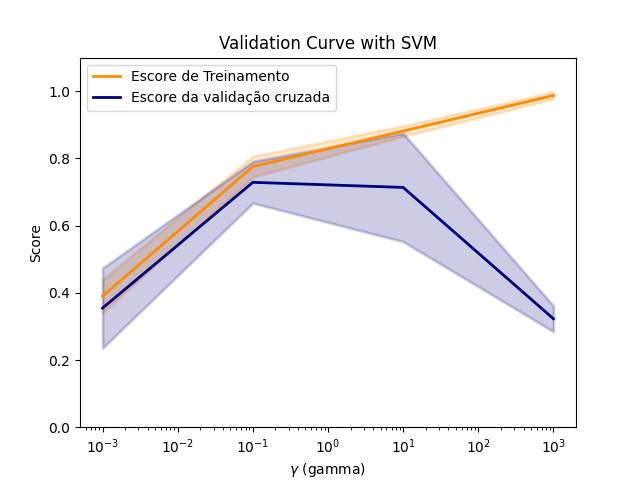

In [7]:
# Exemplo do scikit-learn: validation_plot 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Escore de Treinamento',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Escore da validação cruzada',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Árvores de Decisão


#### 6 - Importar dataset Íris e executar árvore de decisão

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Acurácia da árvore de decisão no conjunto de treinamento: {:.2f}'.format(clf.score(X_train, y_train)))
print('Acurácia da árvore de decisão no conjunto de teste: {:.2f}'.format(clf.score(X_test, y_test)))

Acurácia da árvore de decisão no conjunto de treinamento: 1.00
Acurácia da árvore de decisão no conjunto de teste: 0.95


#### 7 - Profundidade da árvore (evitar overfitting)

In [9]:
clf2 = DecisionTreeClassifier(min_samples_leaf = 10).fit(X_train, y_train)

print('Acurácia da árvore de decisão no conjunto de treinamento: {:.2f}'.format(clf2.score(X_train, y_train)))
print('Acurácia da árvore de decisão no conjunto de teste: {:.2f}'.format(clf2.score(X_test, y_test)))

Acurácia da árvore de decisão no conjunto de treinamento: 0.96
Acurácia da árvore de decisão no conjunto de teste: 0.95


In [31]:
# conda install python-graphviz

#### 8 - Visualizando árvores de decisão

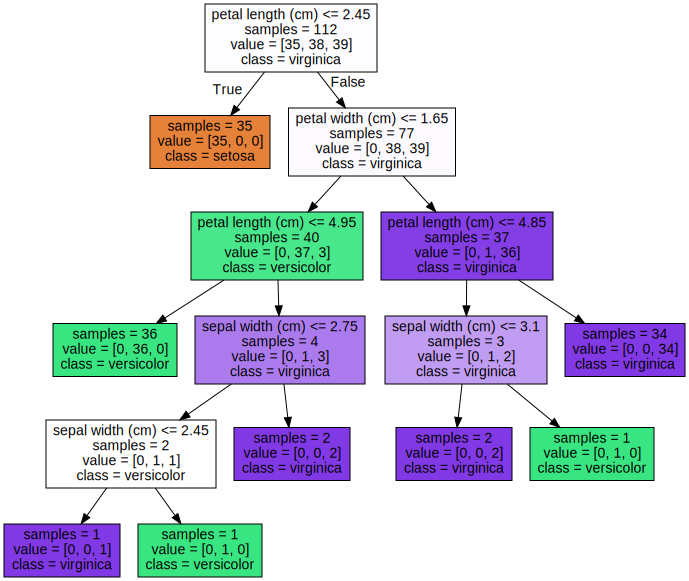

In [15]:
def plot_decision_tree(clf, feature_names, class_names):
    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, 
                    class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

plot_decision_tree(clf, iris.feature_names, iris.target_names)

#### 9 - Pré-podagem

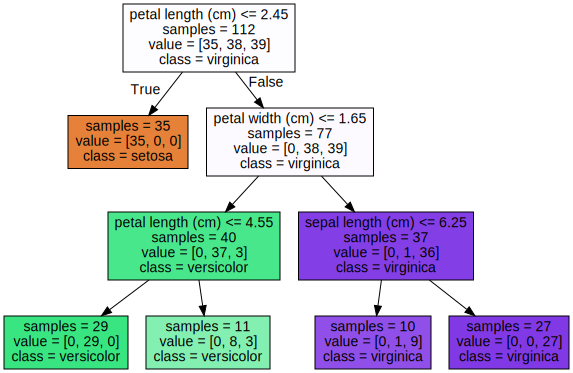

In [16]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

#### 10 - Importância da Característica

In [17]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Importância")
    plt.ylabel("Característica")
    plt.yticks(np.arange(c_features), feature_names)

<IPython.core.display.Javascript object>


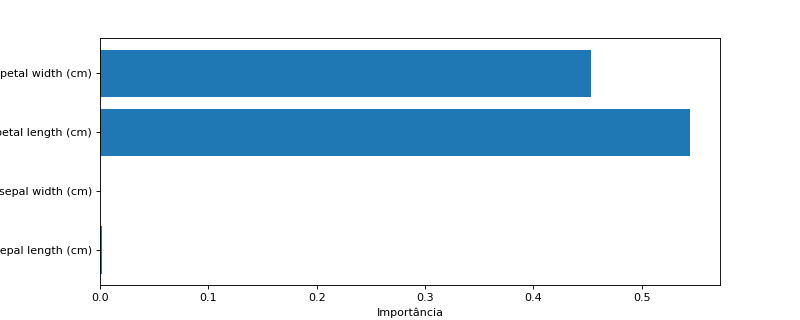

Importâncias: [0.00213291 0.         0.54485625 0.45301083]


In [18]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf2, iris.feature_names)
plt.show()

print('Importâncias: {}'.format(clf2.feature_importances_))

## Classificadores dummy e Base de dados pré-carregadas

#### 11 - Carregando base de dados (digits)

In [19]:
from sklearn.datasets import load_digits

dataset = load_digits()

X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


#### 12 - Transformando a base de dados para não-balanceada

In [20]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original:\t', y[1:30])
print('Novo:\t', y_binary_imbalanced[1:30])

Original:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
Novo:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


#### 13 - Verificando proporções da base de dados não-balanceada

In [21]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

#### 14 - Treinando um classificador SVC

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

#### 15 - Classificadores "bôbos" Dummy

In [23]:
from sklearn.dummy import DummyClassifier

# DummyClassifier?

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 16 - Escore de teste do classificador dummy

In [24]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

#### 17 - Carregar novo classificador SVC linear e verificar escore de teste 

In [25]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

### Matrizes de Confusão (Confusion matrices)


True Negative (TN)  | False Positive (FP)

False Negative (FN) | True Positive (TP)


#### 18 - Matrizes de confusão binária

In [26]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Classe mais frequente\n', confusion)

Classe mais frequente
 [[407   0]
 [ 43   0]]


#### 19 - Matriz de confusão - classificador Dummy

In [27]:
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Estratificado\n', confusion)

Estratificado
 [[370  37]
 [ 39   4]]


#### 20 - Matriz de confusão - SVC

In [28]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('SVC (kernel linear, C=1)\n', confusion)

SVC (kernel linear, C=1)
 [[402   5]
 [  5  38]]


#### 21 - Matriz de confusão - Regressão Logística

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Regressão Logística\n', confusion)

Regressão Logística
 [[401   6]
 [  8  35]]


/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 22 - Matriz de confusão - Árvore de decisão

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Árvore de decisão (max_depth = 2)\n', confusion)

Árvore de decisão (max_depth = 2)
 [[404   3]
 [ 13  30]]


## Métricas de avaliação para classificação binária


### Acurácia = TP + TN / (TP + TN + FP + FN)
###  Precisão = TP / (TP + FP) aka PPV (Positive predictive value)
###  Recall = TP / (TP + FN)  aka TPR (True Positive Rate)
###  F1 = 2 * Precisão * Recall / (Precisão + Recall) 

#### 23 - Computando métricas

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Acurácia: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precisão: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Acurácia: 0.96
Precisão: 0.91
Recall: 0.70
F1: 0.79


#### 24 - Reporte combinado

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.97      0.99      0.98       407
           1       0.91      0.70      0.79        43

    accuracy                           0.96       450
   macro avg       0.94      0.85      0.89       450
weighted avg       0.96      0.96      0.96       450



#### 25 - Outros reportes combinados

In [34]:
print('Estratificado (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Regressão Logística\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Árvore de Decisão\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Estratificado (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.91      0.91       407
           1       0.10      0.09      0.10        43

    accuracy                           0.83       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.83      0.83      0.83       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Regressão Logística
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg       0.97  

### Funções de Decisão


#### 26 - Função de decisão

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

y_score_list

/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.82878885428698),
 (0, -19.38292791420195),
 (0, -29.198327257201743),
 (0, -21.746174115798574),
 (0, -22.64239804996128),
 (0, -11.80601316319518),
 (1, 6.496016572624416),
 (0, -23.35456282787909),
 (0, -27.543436971220387),
 (0, -26.88821968799928),
 (0, -31.86269074250119),
 (0, -22.486131395524808),
 (0, -25.31799892081813),
 (0, -13.384564231087923),
 (0, -13.565608315834),
 (0, -13.308404562543435),
 (1, 12.180778621399947),
 (0, -34.36249371177895),
 (0, -13.231503124195685),
 (0, -29.593934459364586)]

#### 27 - Função Proba

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

y_proba_list

/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, 1.1105077627365785e-13),
 (0, 3.8203342505101854e-09),
 (0, 2.0860638224426631e-13),
 (0, 3.5954775289931444e-10),
 (0, 1.4673424093995484e-10),
 (0, 7.459511542756899e-06),
 (1, 0.9984928349973813),
 (0, 7.198503772008908e-11),
 (0, 1.0915341073965711e-12),
 (0, 2.1018153589129763e-12),
 (0, 1.4528113762683703e-14),
 (0, 1.715525648508253e-10),
 (0, 1.0104917586429055e-11),
 (0, 1.5387105925755556e-06),
 (0, 1.2838982508367566e-06),
 (0, 1.6604760443198858e-06),
 (1, 0.9999948719431359),
 (0, 1.1927751884236894e-15),
 (0, 1.793207006513804e-06),
 (0, 1.404486491577931e-13)]

#### 28 - Curvas de Precisão-Recall

<IPython.core.display.Javascript object>


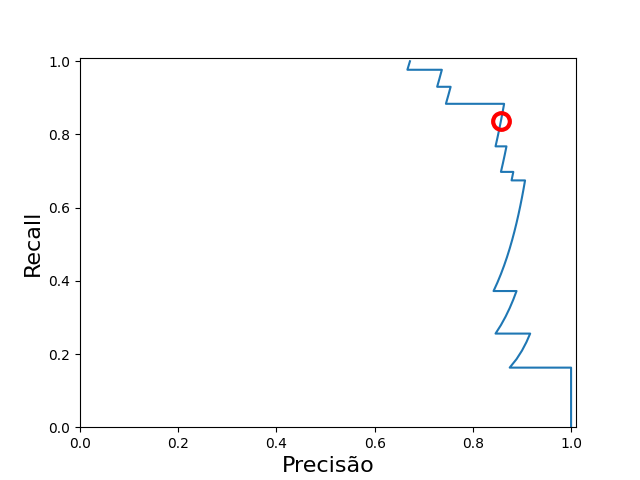

In [46]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Curva de Precisão-Recall')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precisão', fontsize=16)
plt.ylabel('Recall', fontsize=16)
# plt.axes().set_aspect('equal')
plt.show()

#### 29 - Área abaixo da curva ROC (Característica de Operação do Receptor)


/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


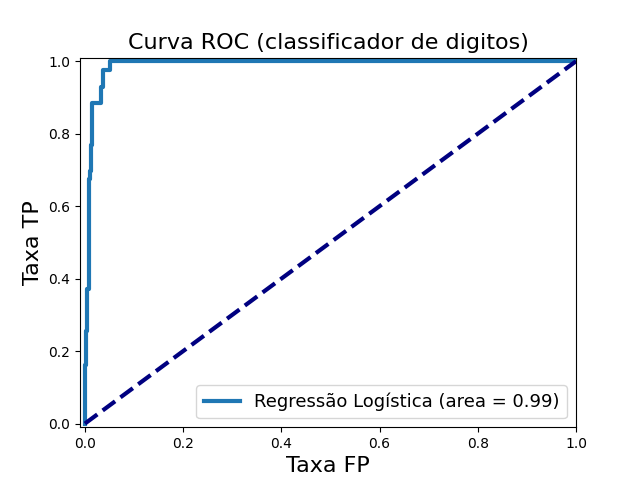

In [48]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='Regressão Logística (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('Taxa FP', fontsize=16)
plt.ylabel('Taxa TP', fontsize=16)
plt.title('Curva ROC (classificador de digitos)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
# plt.axes().set_aspect('equal')
plt.show()

#### 30 - Curvas ROC

<IPython.core.display.Javascript object>


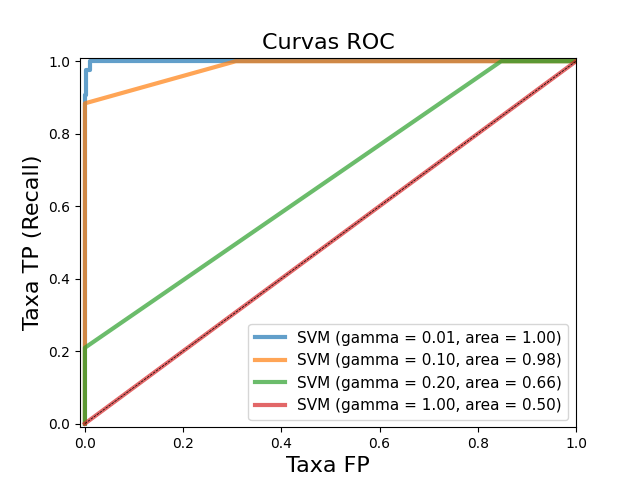

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


In [49]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

    
    
plt.xlabel('Taxa FP', fontsize=16)
plt.ylabel('Taxa TP (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('Curvas ROC', fontsize=16)
# plt.axes().set_aspect('equal')

plt.show()